In [1]:
# Packages for data manipulation
import pandas as pd
import numpy as np

# Data visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns


%matplotlib inline

In [2]:
# Importing Steam data from 2017 into a pandas dataframe

df = pd.read_csv('./steam_data.csv')

In [3]:
df.head()

,User ID,Game Title,Hours Played
0,151603712,The Elder Scrolls V Skyrim,273.0
1,151603712,Fallout 4,87.0
2,151603712,Spore,14.9
3,151603712,Fallout New Vegas,12.1
4,151603712,Left 4 Dead 2,8.9


In [4]:
# Checking for null values

df.isnull().sum()

User ID         0
Game Title      0
Hours Played    0
dtype: int64

In [5]:
# Number of unique users

df['User ID'].nunique()

11350

In [6]:
# Number of unique games

df['Game Title'].nunique()

3600

In [7]:
# Total hours played across all games

df['Hours Played'].sum()

3445365.8

In [8]:
# Groupby to show the games with the highest player count

df.groupby('Game Title')['User ID'].nunique().sort_values(ascending=False).head(10)

Game Title
Dota 2                             4841
Team Fortress 2                    2323
Counter-Strike Global Offensive    1377
Unturned                           1069
Left 4 Dead 2                       801
Counter-Strike Source               715
The Elder Scrolls V Skyrim          677
Garry's Mod                         666
Counter-Strike                      568
Sid Meier's Civilization V          554
Name: User ID, dtype: int64

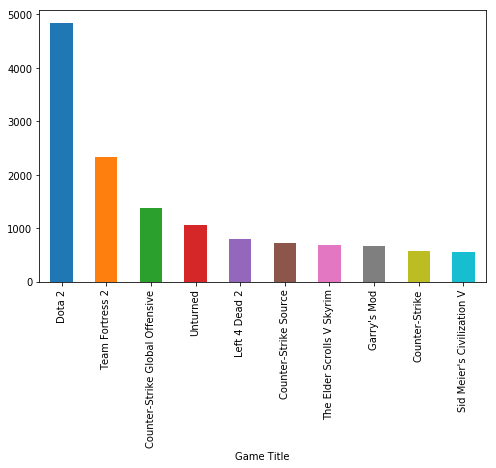

In [9]:
# Plot to show the games with the highest player count

df.groupby('Game Title')['User ID'].nunique().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(8,5))

In [10]:
# Groupby to show the most played games on Steam

df.groupby('Game Title')['Hours Played'].sum().sort_values(ascending=False).head(10)

Game Title
Dota 2                                         981684.6
Counter-Strike Global Offensive                322771.6
Team Fortress 2                                173673.3
Counter-Strike                                 134261.1
Sid Meier's Civilization V                      99821.3
Counter-Strike Source                           96075.5
The Elder Scrolls V Skyrim                      70889.3
Garry's Mod                                     49725.3
Call of Duty Modern Warfare 2 - Multiplayer     42009.9
Left 4 Dead 2                                   33596.7
Name: Hours Played, dtype: float64

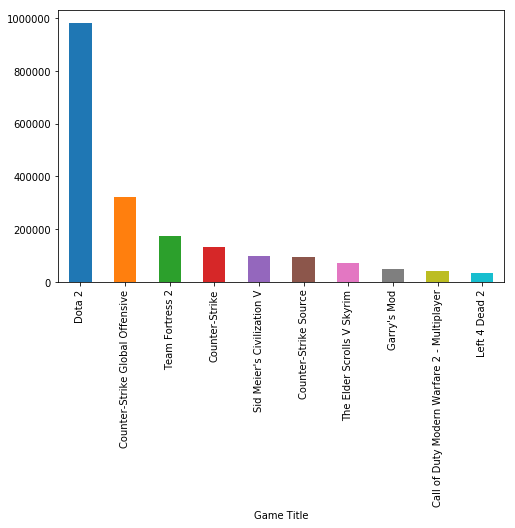

In [11]:
# Plot to show the most played games on Steam

df.groupby('Game Title')['Hours Played'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(8,5))

In [12]:
# Top 10 most active users by hours played

df.groupby('User ID')['Hours Played'].sum().sort_values(ascending=False).head(10)

User ID
73017395     11754.0
10599862     11651.7
100630947    10853.2
26762388     10470.1
153382649     9640.0
43684632      9546.3
48798067      9427.2
52731290      9417.6
42935819      8172.9
14544587      8137.1
Name: Hours Played, dtype: float64

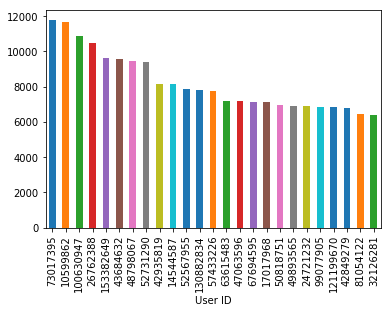

In [13]:
# Plot showing the top 25 most active users by hours played

df.groupby('User ID')['Hours Played'].sum().sort_values(ascending=False).head(25).plot(kind='bar')

In [14]:
# Pivot table 

pivot = pd.pivot_table(df, index='User ID',columns='Game Title',values='Hours Played')

In [15]:
# Filling NaN's with 0's

pivot.fillna(0,inplace=True)

In [16]:
# Assiging previous groupbys to variables to plot

top_users = df.groupby('User ID')['Hours Played'].sum().sort_values(ascending=False).index[0:50]
top_games = df.groupby('Game Title')['Hours Played'].sum().sort_values(ascending=False).index[0:50]

In [17]:
# Putting the top users and games into a dataframe then pivot table for plotting

dff = df[df['User ID'].isin(top_users)]
dff = dff[dff['Game Title'].isin(top_games)]
pivot2 = pd.pivot_table(dff, values='Hours Played', index=['User ID'], columns=['Game Title'], aggfunc=np.sum).fillna(0)

The following cells were assisted by Phil Schmidt.

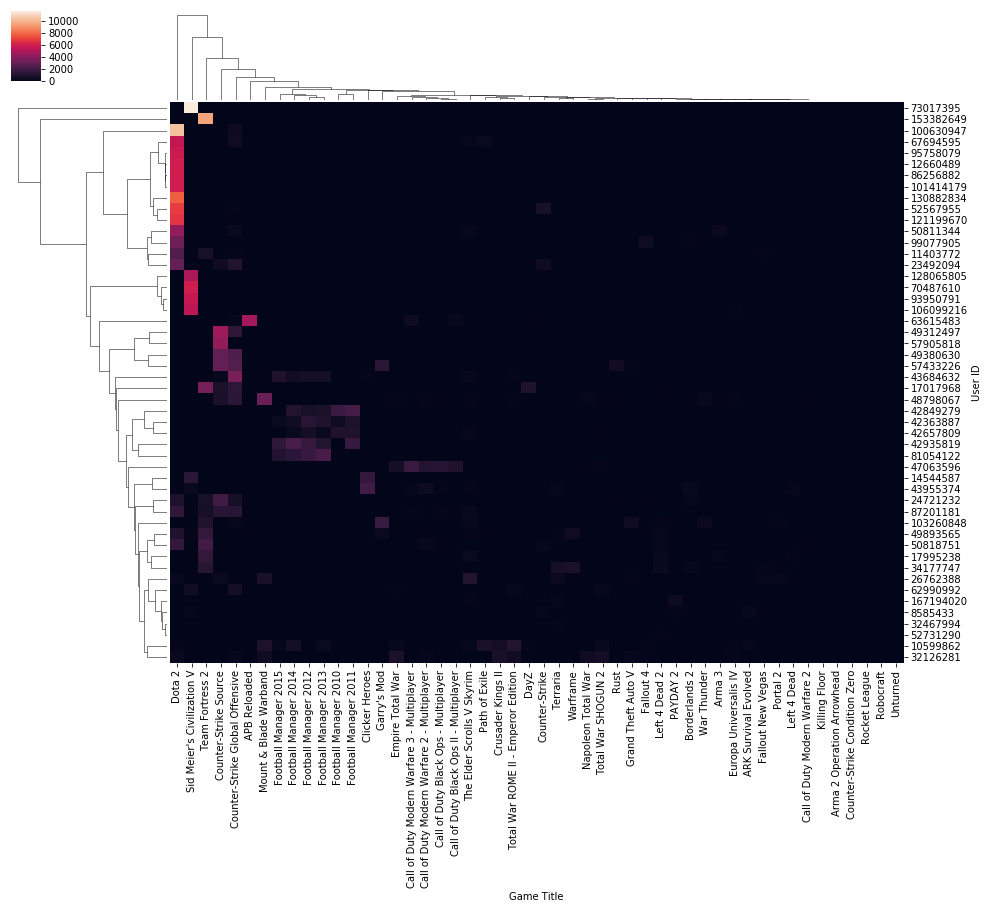

In [18]:
# CLuster plot

sns.clustermap(pivot2, figsize=(16,12));

In [19]:
# User counts df

user_counts = df.groupby('User ID')['User ID'].agg('count').sort_values(ascending=False)
user_df = pd.DataFrame({'user': user_counts.index, 'n': user_counts.values})
user_df.head()

,n,user
0,498,62990992
1,314,11403772
2,299,138941587
3,298,47457723
4,297,49893565


In [20]:
# Game counts df

game_counts = df.groupby('Game Title')['Game Title'].agg('count').sort_values(ascending=False)
game_df = pd.DataFrame({'game': game_counts.index, 'n': game_counts.values})
game_df.head()

,game,n
0,Dota 2,4841
1,Team Fortress 2,2323
2,Counter-Strike Global Offensive,1377
3,Unturned,1069
4,Left 4 Dead 2,801


C:\Users\plog3\Anaconda3\envs\dsi\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


2155 users out of 11350 (18.986784140969164%) in total explain 80.0% of the events in the data.


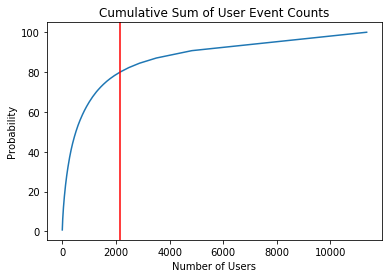

In [21]:
# Plotting cumulative sum of user event accounts

n_events = np.sum(user_df['n'])
csum = np.cumsum(100.0*user_df['n']/n_events)

# 80% of data
threshold = 80.0

threshold_idx = np.argmin(np.abs(csum-threshold))
plt.plot(csum)
plt.xlabel('Number of Users')
plt.ylabel('Probability')
plt.axvline(threshold_idx, color='r')
plt.title('Cumulative Sum of User Event Counts')
print('{} users out of {} ({}%) in total explain {}% of the events in the data.'.format(threshold_idx, user_df.shape[0], 100.0*threshold_idx/user_df.shape[0], threshold));

581 games out of 3600 (16.13888888888889%) in total explain 80.0% of the events in the data.


C:\Users\plog3\Anaconda3\envs\dsi\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


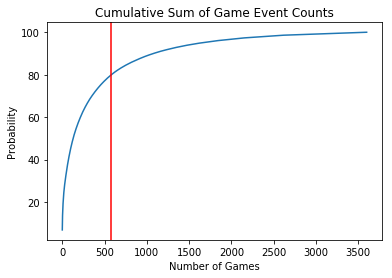

In [22]:
# Plotting cumulative sum of game counts

n_events = np.sum(game_df['n'])
csum = np.cumsum(100.0*game_df['n']/n_events)

# 80% of data
threshold = 80.0

threshold_idx = np.argmin(np.abs(csum-threshold))
plt.plot(csum)
plt.xlabel('Number of Games')
plt.ylabel('Probability')
plt.axvline(threshold_idx, color='r')
plt.title('Cumulative Sum of Game Event Counts')
print('{} games out of {} ({}%) in total explain {}% of the events in the data.'.format(threshold_idx, game_df.shape[0], 100.0*threshold_idx/game_df.shape[0], threshold))